In [65]:
import warnings
warnings.filterwarnings('ignore')

# SVM Part (Code And Report) Done By: Moutaz Jaber 202262820

## Data Preparation For SVM

In [68]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = "./heart_disease_uci_formatted_and_cleaned.csv"
heart_disease_data = pd.read_csv(file_path)

# Display basic information
print("Dataset Information:")
print(heart_disease_data.info())
print("\nFirst few rows of the dataset:")
print(heart_disease_data.head())

# Encode categorical variables
categorical_columns = ['sex', 'cp', 'restecg', 'slope', 'thal', 'fbs', 'exang']
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    heart_disease_data[col] = label_encoders[col].fit_transform(heart_disease_data[col])

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
heart_disease_data[numerical_columns] = scaler.fit_transform(heart_disease_data[numerical_columns])

print("\nTransformed Dataset:")
print(heart_disease_data.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    float64
 1   sex       700 non-null    object 
 2   cp        700 non-null    object 
 3   trestbps  700 non-null    float64
 4   chol      700 non-null    float64
 5   fbs       700 non-null    bool   
 6   restecg   700 non-null    object 
 7   thalch    700 non-null    float64
 8   exang     700 non-null    bool   
 9   oldpeak   700 non-null    float64
 10  slope     700 non-null    object 
 11  thal      700 non-null    object 
 12  num       700 non-null    int64  
dtypes: bool(2), float64(5), int64(1), object(5)
memory usage: 61.7+ KB
None

First few rows of the dataset:
    age     sex               cp  trestbps   chol    fbs         restecg  \
0  63.0    Male   typical angina     145.0  233.0   True  lv hypertrophy   
1  67.0    Male     asymptom

## Dataset Splitting For Training and testing

In [70]:
# Define features (X) and target (y)
X = heart_disease_data.drop(columns=['num'])
y = heart_disease_data['num']

# Split the dataset into training and testing sets (75% training and 25% testing like the slides) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Display split information
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")

Training set size: (525, 12), Test set size: (175, 12)


## Initial Training Without any Adjustments

In [72]:
#Initialize and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate initial performance
y_pred = svm_model.predict(X_test)
print("Initial SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Initial SVM Model Performance:
Accuracy: 0.6057142857142858

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83        87
           1       0.38      0.46      0.41        46
           2       0.00      0.00      0.00        19
           3       0.43      0.18      0.25        17
           4       0.00      0.00      0.00         6

    accuracy                           0.61       175
   macro avg       0.31      0.32      0.30       175
weighted avg       0.51      0.61      0.54       175



## Addressing Class Imbalance Using SMOTE 

In [74]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Display class distribution after SMOTE
print("Class distribution after SMOTE:\n", y_train_smote.value_counts())

Class distribution after SMOTE:
 num
3    256
0    256
1    256
2    256
4    256
Name: count, dtype: int64


## Retraining SVM Model on Balanced Data (aka after applying SMOTE) AND Default kernel

In [76]:
# Retrain the SVM model on SMOTE data (rbf)
svm_model_smote = SVC(kernel='rbf', random_state=42)
svm_model_smote.fit(X_train_smote, y_train_smote)

# Predict and evaluate performance
y_pred_smote = svm_model_smote.predict(X_test)
print("SVM Model Performance after SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))

SVM Model Performance after SMOTE:
Accuracy: 0.5828571428571429

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80        87
           1       0.42      0.39      0.40        46
           2       0.33      0.26      0.29        19
           3       0.30      0.35      0.32        17
           4       0.20      0.17      0.18         6

    accuracy                           0.58       175
   macro avg       0.41      0.40      0.40       175
weighted avg       0.57      0.58      0.58       175



## Retraining SVM Model on Balanced Data and Different Options Manually

In [78]:
# Retrain the SVM model on SMOTE data (poly)
svm_model_smote = SVC(kernel='poly', random_state=42)
svm_model_smote.fit(X_train_smote, y_train_smote)

# Predict and evaluate performance
y_pred_smote = svm_model_smote.predict(X_test)
print("SVM Model Performance after SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))

SVM Model Performance after SMOTE:
Accuracy: 0.5714285714285714

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        87
           1       0.40      0.41      0.41        46
           2       0.26      0.26      0.26        19
           3       0.33      0.35      0.34        17
           4       0.20      0.17      0.18         6

    accuracy                           0.57       175
   macro avg       0.40      0.40      0.40       175
weighted avg       0.57      0.57      0.57       175



In [79]:
# Retrain the SVM model on SMOTE data (sigmoid)
svm_model_smote = SVC(kernel='sigmoid', random_state=42)
svm_model_smote.fit(X_train_smote, y_train_smote)

# Predict and evaluate performance
y_pred_smote = svm_model_smote.predict(X_test)
print("SVM Model Performance after SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))

SVM Model Performance after SMOTE:
Accuracy: 0.4857142857142857

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.70      0.74        87
           1       0.37      0.33      0.34        46
           2       0.20      0.26      0.23        19
           3       0.10      0.06      0.07        17
           4       0.14      0.50      0.22         6

    accuracy                           0.49       175
   macro avg       0.32      0.37      0.32       175
weighted avg       0.52      0.49      0.50       175



In [80]:
# Retrain the SVM model on SMOTE data (linear)
svm_model_smote = SVC(kernel='linear', random_state=42)
svm_model_smote.fit(X_train_smote, y_train_smote)

# Predict and evaluate performance
y_pred_smote = svm_model_smote.predict(X_test)
print("SVM Model Performance after SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))

SVM Model Performance after SMOTE:
Accuracy: 0.5428571428571428

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82        87
           1       0.41      0.33      0.36        46
           2       0.11      0.11      0.11        19
           3       0.15      0.18      0.16        17
           4       0.27      0.50      0.35         6

    accuracy                           0.54       175
   macro avg       0.35      0.39      0.36       175
weighted avg       0.55      0.54      0.54       175



In [81]:
# Retrain the SVM model on SMOTE data (rbf)
svm_model_smote = SVC(kernel='rbf', random_state=42)
svm_model_smote.fit(X_train_smote, y_train_smote)

# Predict and evaluate performance
y_pred_smote = svm_model_smote.predict(X_test)
print("SVM Model Performance after SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))

SVM Model Performance after SMOTE:
Accuracy: 0.5828571428571429

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80        87
           1       0.42      0.39      0.40        46
           2       0.33      0.26      0.29        19
           3       0.30      0.35      0.32        17
           4       0.20      0.17      0.18         6

    accuracy                           0.58       175
   macro avg       0.41      0.40      0.40       175
weighted avg       0.57      0.58      0.58       175



## Hyperparameter Tuning On the balanced Data with GridSearch Cross-Validation

In [83]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 'scale'],
    'kernel': ['rbf']
}

# Perform Grid Search with Cross-Validation
grid = GridSearchCV(SVC(random_state=42), param_grid, refit=True, cv=15)
grid.fit(X_train_smote, y_train_smote)

# Display the best parameters and the best model
print("Best Parameters:", grid.best_params_)
print("\nBest Recall Score:", grid.best_score_)

# Evaluate the best model on the test set
y_pred_tuned = grid.best_estimator_.predict(X_test)
print("Tuned SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))

Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}

Best Recall Score: 0.8784860921112632
Tuned SVM Model Performance:
Accuracy: 0.5771428571428572

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.90      0.74        87
           1       0.50      0.41      0.45        46
           2       0.40      0.11      0.17        19
           3       0.29      0.12      0.17        17
           4       0.00      0.00      0.00         6

    accuracy                           0.58       175
   macro avg       0.36      0.31      0.30       175
weighted avg       0.51      0.58      0.52       175



# THE FINAL SVM MODEL, CROSS VALIDATED

## Using a Pipeline
why did we use a pipeline? After doing some research, I found the following.

A pipeline combines multiple steps (like preprocessing and model training) into a single object.
It ensures that SMOTE (oversampling) is applied only on the training data during cross-validation, avoiding data leakage, which is the main cause why all the results are low in the previous models.

Steps in the Pipeline:
'smote': Uses SMOTE to balance the dataset by oversampling minority classes.
'svm': Fits the SVM model after SMOTE creates a balanced dataset.

During each fold of cross-validation, the pipeline first applies SMOTE to the training data and then trains the SVM model on the resampled data. 

In [86]:
# Integrate SMOTE into a pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('svm', svm_model)
])

## Using RandomizedSearch Cross-validation

What is RandomizedSearchCV?

A tool for hyperparameter tuning that evaluates a random subset of hyperparameter combinations.
Faster than the computationally expensive GridSearchCV since it explores only a limited number of combinations (n_iter=10), and it is easier for us to train as students with low computational power.

In [88]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

#Define the parameter distribution for 'rbf' kernel since it was the best one when tested manually
param_dist = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

# Integrate into the pipeline
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions={'svm__' + k: v for k, v in param_dist.items()},  # Map params to the 'svm' step
    n_iter=10,       # Number of random combinations to try (special to RandomizedSearchCV, helps us with low computational power)
    scoring='recall', # if someone was having heart disease and wasn't diagnosed, its dangerous, so recall is most important
    cv=10,
    verbose=1,
    random_state=42,
)

random_search.fit(X, y)

# Best parameters according to the new randomized search cross validation technique
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model according to the new randomized search cross validation technique AND the best parameters
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameters: {'svm__gamma': 1, 'svm__C': 0.1}
Test Performance:
Accuracy: 0.8114285714285714

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.99      0.86        87
           1       0.95      0.43      0.60        46
           2       0.90      0.95      0.92        19
           3       0.88      0.88      0.88        17
           4       1.00      0.50      0.67         6

    accuracy                           0.81       175
   macro avg       0.90      0.75      0.78       175
weighted avg       0.84      0.81      0.79       175



## Confusion Matrix For Final Model

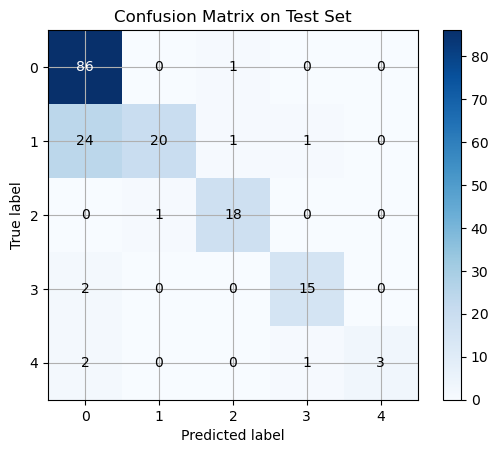

In [90]:
import scikitplot as skplt
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

#Generate the confusion matrix plot
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title="Confusion Matrix on Test Set")
plt.show()

## Support Vectors, Soft and hard margin

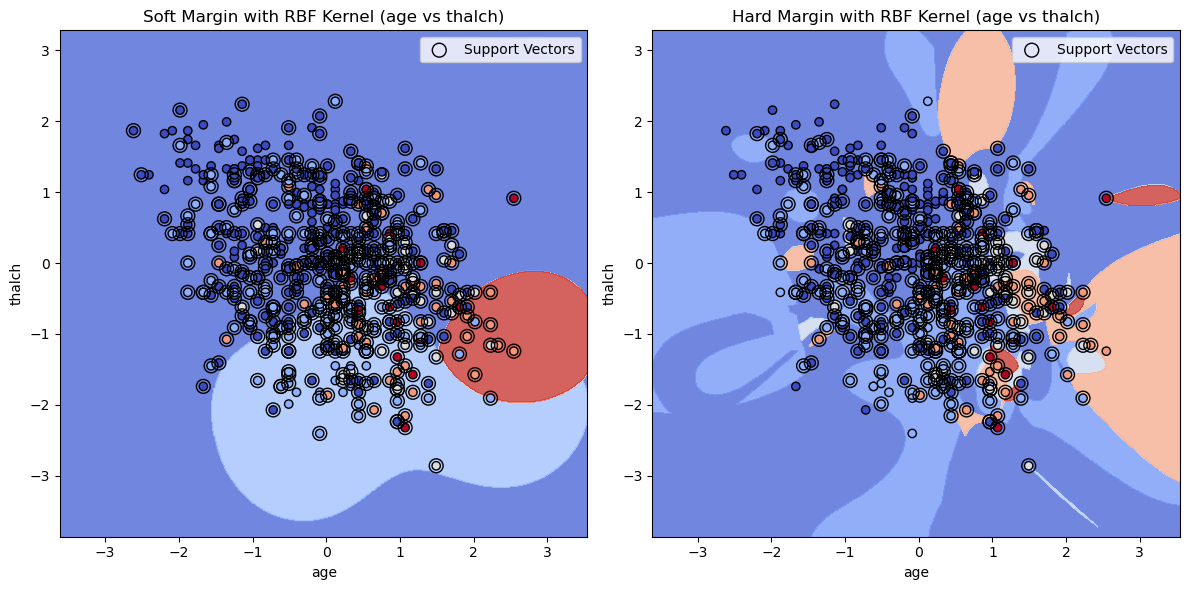

Soft Margin Support Vectors (RBF) (age, thalch):
 [[ 5.44122222e-01  1.03706576e+00]
 [ 1.91345636e+00 -4.13086123e-01]
 [-5.09211726e-01  1.90715690e+00]
 [-4.03878331e-01 -4.13086123e-01]
 [ 1.70278957e+00  4.57005009e-01]
 [-1.93211541e-01 -7.03116500e-01]
 [ 9.65455802e-01 -2.23613421e+00]
 [-7.19878516e-01 -8.27415234e-01]
 [-1.98387925e+00  4.15572098e-01]
 [ 1.22788643e-01 -7.44549412e-01]
 [ 1.59745617e+00 -1.03457979e+00]
 [ 9.65455802e-01 -9.93146878e-01]
 [-7.19878516e-01 -9.93146878e-01]
 [-1.93211541e-01  1.24298733e-03]
 [-1.45721228e+00 -3.30220301e-01]
 [-1.14121209e+00 -7.44549412e-01]
 [ 5.44122222e-01 -3.71653212e-01]
 [ 4.38788828e-01  3.32706276e-01]
 [ 1.74552483e-02 -3.30220301e-01]
 [ 4.38788828e-01 -1.82180510e+00]
 [-1.03587870e+00  1.03706576e+00]
 [ 1.07078920e+00  1.32709614e+00]
 [-1.14121209e+00  4.15572098e-01]
 [ 3.33455433e-01  9.12767030e-01]
 [ 2.28122038e-01 -1.64488657e-01]
 [-1.14121209e+00 -1.23055746e-01]
 [-8.78781466e-02 -8.16228348e-02]
 [ 5.

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns

# Select 'age' and 'thalch' as features for visualization
feature_1 = 'age'
feature_2 = 'thalch'

# Extract the selected features from the scaled training data
X_train_visual = X_train[[feature_1, feature_2]].values  
y_train_visual = y_train

# Fit SVM with soft margin using RBF kernel
soft_margin_rbf_model = SVC(kernel='rbf', C=1, gamma=0.5, random_state=42)
soft_margin_rbf_model.fit(X_train_visual, y_train_visual)
soft_support_vectors = soft_margin_rbf_model.support_vectors_

# Fit SVM with hard margin using RBF kernel
hard_margin_rbf_model = SVC(kernel='rbf', C=1e6, gamma=0.5, random_state=42)
hard_margin_rbf_model.fit(X_train_visual, y_train_visual)
hard_support_vectors = hard_margin_rbf_model.support_vectors_

# Visualization of decision boundary for soft margin
x_min, x_max = X_train_visual[:, 0].min() - 1, X_train_visual[:, 0].max() + 1
y_min, y_max = X_train_visual[:, 1].min() - 1, X_train_visual[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z_soft = soft_margin_rbf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_soft = Z_soft.reshape(xx.shape)

Z_hard = hard_margin_rbf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z_hard = Z_hard.reshape(xx.shape)

# Plot decision boundaries and support vectors for soft margin
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_soft, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_visual[:, 0], X_train_visual[:, 1], c=y_train_visual, edgecolor='k', cmap=plt.cm.coolwarm)
plt.scatter(soft_support_vectors[:, 0], soft_support_vectors[:, 1], s=100, facecolors='none', edgecolors='black', label='Support Vectors')
plt.title(f"Soft Margin with RBF Kernel ({feature_1} vs {feature_2})")
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.legend()

# Plot decision boundaries and support vectors for hard margin
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_hard, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_visual[:, 0], X_train_visual[:, 1], c=y_train_visual, edgecolor='k', cmap=plt.cm.coolwarm)
plt.scatter(hard_support_vectors[:, 0], hard_support_vectors[:, 1], s=100, facecolors='none', edgecolors='black', label='Support Vectors')
plt.title(f"Hard Margin with RBF Kernel ({feature_1} vs {feature_2})")
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.legend()

plt.tight_layout()
plt.show()

# Print the support vectors
print(f"Soft Margin Support Vectors (RBF) ({feature_1}, {feature_2}):\n", soft_support_vectors)
print(f"\nHard Margin Support Vectors (RBF) ({feature_1}, {feature_2}):\n", hard_support_vectors)